<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/Spotify_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Housekeeping

First things first, I install the tools we will need in this notebook. I use Pandas, Numpy, Matplotlib, and Folium.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
!pip install folium pandas
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here I store the CSV I used in a Pandas dataframe called Spotify. I found this dataset on Kaggle at https://www.kaggle.com/datasets/dhruvildave/spotify-charts. It has data about the "Top 200" and "Viral 50" charts published globally by Spotify. I mainly use the Viral 50 chart.

In [ ]:
spotify = pd.read_csv("drive/MyDrive/charts.csv")
spotify.dtypes

title       object
rank         int64
date        object
artist      object
url         object
region      object
chart       object
trend       object
streams    float64
dtype: object

I saw that the date column in the dataframe was read in as a string, and I wanted it in the datetime type so I fix that here.

In [ ]:
date = pd.to_datetime(spotify['date'])
spotify['date'] = date

In [ ]:
spotify.dtypes

title              object
rank                int64
date       datetime64[ns]
artist             object
url                object
region             object
chart              object
trend              object
streams           float64
dtype: object

Here I condensed the datafram to only contain data from the Viral50 chart.

In [ ]:
viral50 = spotify[spotify['chart'].str.contains('viral50') == True]
viral50

,title,rank,date,artist,url,region,chart,trend,streams
12808,Boys,13,2017-08-01,Charli XCX,https://open.spotify.com/track/5o4yGlG0PfeVUa6...,Latvia,viral50,MOVE_UP,NaN
12965,Hold Me,19,2017-08-01,R3HAB,https://open.spotify.com/track/2a9xGmpgNyNz9QV...,Luxembourg,viral50,MOVE_DOWN,NaN
13781,Hola Hola,40,2017-08-01,KARD,https://open.spotify.com/track/3VC1IEz9M1txlMS...,Peru,viral50,NEW_ENTRY,NaN
14042,Cuídate,4,2017-08-01,Zetazen,https://open.spotify.com/track/0WgnbqlHieZmdYa...,Spain,viral50,SAME_POSITION,NaN
14092,Boys,13,2017-08-01,Charli XCX,https://open.spotify.com/track/5o4yGlG0PfeVUa6...,Taiwan,viral50,MOVE_DOWN,NaN
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


#Shape of You Timeseries

Here is a timeseries following the rank of the song Shape of You by Ed Sheeran on the Viral50 Chart. It was number 1 for a while and began to drop off, came back for a bit and then steadily fizzled out. 4 months on the chart is still very impressive though. I inverted the y axis so that the number 1 spot would be on top and number 50 on the bottom.

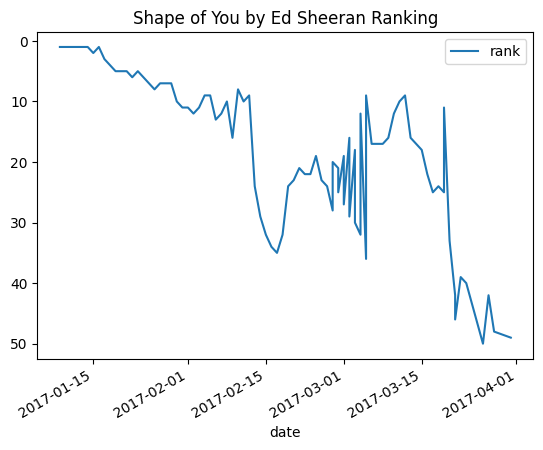

In [ ]:
shapeofyou = viral50[viral50['title'].str.contains('Shape of You') == True]
shapeofyou_global = shapeofyou[shapeofyou['region'].str.contains('Global') == True]
shape = pd.DataFrame()
shape['date'] = shapeofyou_global['date']
shape['rank'] = shapeofyou_global['rank']
shape.set_index(['date'], inplace = True)
shape.plot().invert_yaxis()
plt.title("Shape of You by Ed Sheeran Ranking")
plt.show()

#Harry Styles Boxplots

Here I sorted the Viral50 chart to only contain entries from Harry Styles and be from the Global region.

In [ ]:
harry = viral50[viral50['artist'].str.contains('Harry Styles') == True]
harry_global = harry[harry['region'].str.contains('Global') == True]

Here I deleted the streams column because it was messing up the boxplots below and was not relevant to them anyways. I also replaced the name of a song with a shortened version of it for simplicity.

In [ ]:
del harry_global['streams']
harry_global.replace('Girl Crush - Recorded at Metropolis Studios, London', 'Girl Crush', inplace = True)

<ipython-input-8-3fb0ab60d598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harry_global.replace('Girl Crush - Recorded at Metropolis Studios, London', 'Girl Crush', inplace = True)


Heres mutiple boxplots of all the Harry Styles songs on the Viral50 Global Chart. We can see some interesting things from these graphs, such as the fact that Girl Crush had the highest average rank, but Sign of the Times was the farthest up on the graph. There are not many outliers, only one on the Sweet Creature plot. I assume this is when it was on its way off the chart.

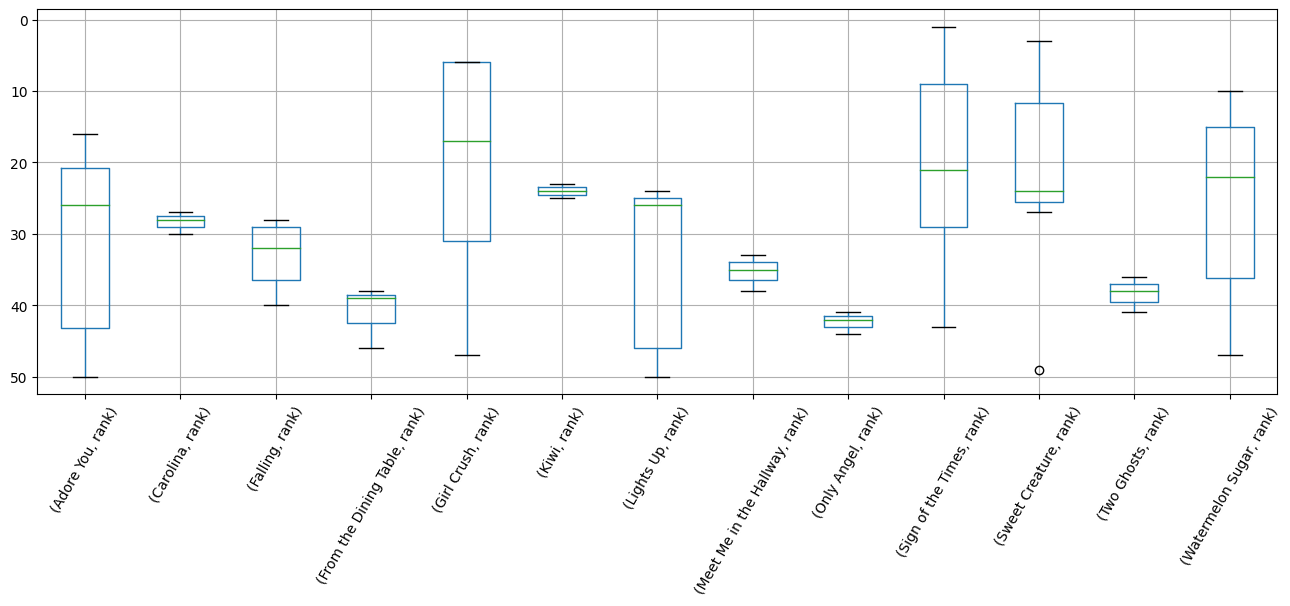

In [ ]:
grouped = harry_global.groupby(by='title')

grouped.boxplot(rot=60, fontsize=10, figsize=(16,5), subplots = False).invert_yaxis()

#Number 1 Hit Mapping



Here I condensed the viral50 chart data to only contain entries where SLOW DANCING IN THE DARK by Joji was at the #1 spot on the charts. Then I found the unique regions in which it was #1.

In [ ]:
joji = viral50[viral50['artist'].str.contains('Joji') == True]
joji1 = joji[joji['rank'] == 1]
slowdancing = joji1[joji1['title'].str.contains('SLOW DANCING IN THE DARK') == True]
slowdancing_uni = slowdancing['region'].unique()

In [ ]:
slowdancing_uni

array(['Estonia', 'Lithuania', 'Hong Kong', 'Greece'], dtype=object)

I did the same thing as above with Paramore's Hard Times.

In [ ]:
paramore = viral50[viral50['artist'].str.contains('Paramore') == True]
paramore1 = paramore[paramore['rank'] == 1]
hardtimes = paramore1[paramore1['title'].str.contains('Hard Times') == True]
hardtimes_uni = hardtimes['region'].unique()

In [ ]:
hardtimes_uni

array(['Chile', 'El Salvador', 'Philippines', 'Indonesia'], dtype=object)

After all this, I then put the information onto a map to visualize where these number 1 hits took place.

In [ ]:
chart_top_map = folium.Map(location=[0, 0], zoom_start=2, control_scale=True, min_zoom=2, tiles="OpenStreetMap")

tooltip_g = "Greece"   

greece_marker = folium.Marker(
    location=[39.074208, 21.824312],
    icon=folium.Icon(icon="music", color='purple'),
    popup="<strong>Joji - SLOW DANCING IN THE DARK</strong>",
    tooltip=tooltip_g,
    )

greece_marker.add_to(chart_top_map)

tooltip_hk = "Hong Kong" 

hong_kong_marker = folium.Marker(
    location=[22.396428, 114.109497],
    icon=folium.Icon(icon="music", color='purple'),
    popup="<strong>Joji - SLOW DANCING IN THE DARK</strong>",
    tooltip=tooltip_hk,
    )

hong_kong_marker.add_to(chart_top_map)

tooltip_l = "Lithuania"

lithuania_marker = folium.Marker(
    location=[55.169438, 23.881275],
    icon=folium.Icon(icon="music", color='purple'),
    popup="<strong>Joji - SLOW DANCING IN THE DARK</strong>",
    tooltip=tooltip_l,
    )

lithuania_marker.add_to(chart_top_map)

tooltip_e = "Estonia"

estonia_marker = folium.Marker(
    location=[58.595272, 25.013607],
    icon=folium.Icon(icon="music", color='purple'),
    popup="<strong>Joji - SLOW DANCING IN THE DARK</strong>",
    tooltip=tooltip_e,
    )

estonia_marker.add_to(chart_top_map)

tooltip_c = "Chile"   

chile_marker = folium.Marker(
    location=[-35.675147, -71.542969],
    icon=folium.Icon(icon="music", color='red'),
    popup="<strong>Paramore - Hard Times</strong>",
    tooltip=tooltip_c,
    )

chile_marker.add_to(chart_top_map)

tooltip_el = "El Salvador"   

el_salvador_marker = folium.Marker(
    location=[13.794185, -88.89653],
    icon=folium.Icon(icon="music", color='red'),
    popup="<strong>Paramore - Hard Times</strong>",
    tooltip=tooltip_el,
    )

el_salvador_marker.add_to(chart_top_map)

tooltip_p = "Philippines"   

philippines_marker = folium.Marker(
    location=[12.879721, 121.774017],
    icon=folium.Icon(icon="music", color='red'),
    popup="<strong>Paramore - Hard Times</strong>",
    tooltip=tooltip_p,
    )

philippines_marker.add_to(chart_top_map)

tooltip_i = "Indonesia"   

indonesia_marker = folium.Marker(
    location=[-0.789275, 113.921327],
    icon=folium.Icon(icon="music", color='red'),
    popup="<strong>Paramore - Hard Times</strong>",
    tooltip=tooltip_i,
    )

indonesia_marker.add_to(chart_top_map)

chart_top_map